In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

## KMeans Analysis

### Data Preparation

Lets start by loading in our final dataset that we implemented for the supervised learning portion of the project. To keep consistency between the two models, I used the same cleaned and precprocessed dataset from the supervised model. The columns we dropped in the supervised portion likely would have also introduced more noise to this clustering portion, making it much more difficult to find any separable structure

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

We are going to drop the extra index row that was added as well as the label column as we typically do not want to include the final label in an unsupervised learning task

In [3]:
df = df.drop(columns = [
    'Unnamed: 0',
    'label'
])

In [4]:
df

,age,major_industry_code,major_occupation_code,race,sex,num_persons_worked_for_employer,veterans_benefits,weeks_worked_in_year,education_grouped,citizenship_grouped,ft_or_pt_grouped,class_of_worker_grouped,marital_stat_grouped,has_financial_activity
0,73,Not in universe or children,Not in universe,White,Female,0,2,0,high_school_or_less,us citizen,unemployed,not in universe,previously married,0
1,58,other,Precision production craft & repair,White,Male,1,2,52,some_college,us citizen,unemployed,self employed,previously married,0
2,48,other,Professional specialty,Amer Indian Aleut or Eskimo,Female,1,2,52,some_college,us citizen,fulltime,private,married,1
3,42,other,Executive admin and managerial,White,Male,6,2,52,college,us citizen,unemployed,private,married,1
4,28,other,other,White,Female,4,2,30,high_school_or_less,us citizen,unemployed,private,never married,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138623,39,Education,Adm support including clerical,Other,Male,6,2,52,college,not a citizen,fulltime,private,never married,1
138624,87,Not in universe or children,Not in universe,White,Male,0,2,0,high_school_or_less,us citizen,unemployed,not in universe,married,0
138625,65,other,Executive admin and managerial,White,Male,1,2,52,high_school_or_less,us citizen,unemployed,self employed,married,1
138626,47,Not in universe or children,Not in universe,White,Male,6,2,52,some_college,us citizen,unemployed,not in universe,married,1


Since our unsupervised learning techniques require variables to be numerical we will need to implement a similar preprocessing step to our supervised model where we one hot encode and scale variables. Lets create another column transformer object that will do this for us

In [5]:
categorical = [ #Create the list of categorical variables
    'class_of_worker_grouped',
    'education_grouped',
    'marital_stat_grouped',
    'major_industry_code',
    'major_occupation_code',
    'race',
    'sex',
    'ft_or_pt_grouped',
    'citizenship_grouped',
    'veterans_benefits',
    'has_financial_activity',
    'num_persons_worked_for_employer'
]

numerical = [ #Create the list of numerical variables
    'age',
    'weeks_worked_in_year'
]

ca = ColumnTransformer(transformers = [
    ("cat", OneHotEncoder(handle_unknown = 'ignore', sparse_output = False), categorical), # One hot encoder object, if there is an unknown value the function will raise an error
    ("num", StandardScaler(), numerical) # Standard Scaler object with the standard inputs
    ],
    remainder = 'drop'
)

data = ca.fit_transform(df)
df = pd.DataFrame(data, columns = ca.get_feature_names_out())

In [6]:
df

,cat__class_of_worker_grouped_federal government,cat__class_of_worker_grouped_local government,cat__class_of_worker_grouped_not in universe,cat__class_of_worker_grouped_private,cat__class_of_worker_grouped_self employed,cat__class_of_worker_grouped_state government,cat__class_of_worker_grouped_unemployed,cat__education_grouped_advanced_degree,cat__education_grouped_college,cat__education_grouped_high_school_or_less,...,cat__has_financial_activity_1,cat__num_persons_worked_for_employer_0,cat__num_persons_worked_for_employer_1,cat__num_persons_worked_for_employer_2,cat__num_persons_worked_for_employer_3,cat__num_persons_worked_for_employer_4,cat__num_persons_worked_for_employer_5,cat__num_persons_worked_for_employer_6,num__age,num__weeks_worked_in_year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.588078,-1.366526
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.718225,0.847530
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.138323,0.847530
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.209618,0.847530
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.021480,-0.089186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138623,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.383588,0.847530
138624,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.399940,-1.366526
138625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.124156,0.847530
138626,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.080333,0.847530


### Grid Search for KMeans

We have a significant amount of dimensions with this data, so we are very likely going to need to implement some sort of dimensionality reduction to be able to effectively cluster the data. We are first going to start with PCA reduction and then explore methods such as DBSCAN and Kmeans for clustering the reduced datapoints

The function below will be used to test different parameters of both PCA and KMeans. Since there are hundreds of thousands of unique points in the dataset we will need to use MiniBatchKMeans to speed up processing time. Testing a combination of parameters for both PCA and regular KMeans while also calculating the silhouette, calinski harabasz and davis bouldin scores will take significant computing resources that we do not have right now so mini batch kmeans will help with this process

In [7]:
def best_pcaclustering(df,random_seed):
  """
  Takes in a dataframe and reduces the feature space utilizing the PCA algorithm. The output of the PCA algorithm is then fed into a
  K-Means clustering algorithm to label points into specific clusters. Several different hyperparameters are tested and each iteration the
  silhouette, calinski harabsz and davies bouldin scores are calculated.
  """
  df_new = df.copy()
  records = []
  clusters = [3, 4, 5, 6]
  components = [12, 14, 16, 18, 20]
  batch_sizes = [2000, 3000, 3500, 4000, 4500]
  for component in components:
    pca = PCA(n_components = component, random_state = random_seed)
    pca_f = pca.fit_transform(df_new)
    for cluster in clusters:
        for batch_size in batch_sizes:
          kmeans = MiniBatchKMeans(n_clusters = cluster, init = 'k-means++', batch_size = batch_size, random_state = random_seed)
          labels = kmeans.fit_predict(pca_f)
          s_score = silhouette_score(pca_f, labels)
          ch = calinski_harabasz_score(pca_f, labels)
          db = davies_bouldin_score(pca_f, labels)
          records.append({
                          "silhouette": s_score,
                          "calinski_harabasz": ch,
                          "davies_bouldin": db,
                          "pca_n_components": component,
                          "kmeans_k": cluster,
                          "explained_variance_ratio_sum": pca.explained_variance_ratio_.sum(),
                          "batch_size": batch_size,
                          "random_seed": random_seed
                      })
              
  return pd.DataFrame(records)

We are going to evaluate the function on a sample of 15,000 data points to increase computing time. 15,000 points will still give us a reasonable approximation of the formed groups for the full dataset

In [8]:
df_tst = df.sample(n = 15000, random_state = 42)
results_df = best_pcaclustering(df_tst, 42)

In [9]:
results_df = results_df.sort_values(['silhouette'], ascending = False)
results_df.head(15)

,silhouette,calinski_harabasz,davies_bouldin,pca_n_components,kmeans_k,explained_variance_ratio_sum,batch_size,random_seed
4,0.259820,5360.089789,1.369353,12,3,0.782908,4500,42
3,0.259591,5353.792881,1.374424,12,3,0.782908,4000,42
24,0.246100,4957.220328,1.428517,14,3,0.819366,4500,42
42,0.237034,4644.965212,1.482453,16,3,0.852706,3500,42
63,0.230392,4422.741287,1.506728,18,3,0.880445,4000,42
83,0.220574,4237.144824,1.524420,20,3,0.903690,4000,42
20,0.204177,4948.569690,2.220033,14,3,0.819366,2000,42
23,0.204130,4948.589310,2.220147,14,3,0.819366,4000,42
6,0.202854,4011.586099,2.129353,12,4,0.782908,3000,42
44,0.197486,4638.837770,2.298348,16,3,0.852706,4500,42


### KMeans Results

Based on the results above, we can see that the scores are not overwhelming but are right around where I would expect them to be for a dataset with so many variables and unique datapoints. I wanted to include the explained variance in the grid search function because when using PCA its important to reduce the number of dimensions of the data, but its also important to still capture most of the variance from the original dataset. We can see that the different values for the number of dimensions is able to successfully capture around 80% of the variance of the original data which is what I typically strive for when implementing PCA. I also iterated over different values of batch size for mini batch kmeans to see if there were differences in performance. With the code below we are first going to reduce the dataset to 12 components, then to actually visualize this reduced dataset we are going to assign the cluster labels in this 12 dimension set and then visualize those clusters in a 2D PCA version of the original dataset. THis will allow us to see how the algorithm is clustering the 12 dimensional dataset in only 2 dimensions

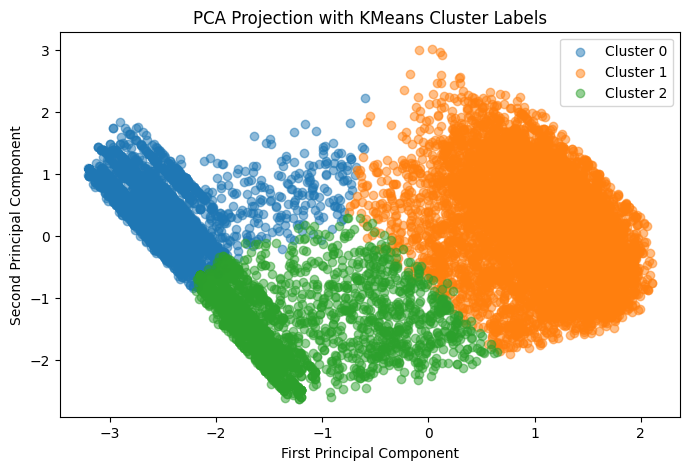

In [10]:
pca = PCA(n_components = 12, random_state = 42)
X_pca = pca.fit_transform(df_tst)
kmeans = MiniBatchKMeans(n_clusters=3, init = 'k-means++', batch_size = 4500, random_state=42)
labels = kmeans.fit_predict(X_pca)
pca_2 = PCA(n_components = 2, random_state = 42)
X_pca_2 = pca_2.fit_transform(df_tst)
df_pca = pd.DataFrame(X_pca_2, columns = ['pc1', 'pc2'])
df_pca['cluster'] = labels


df_pca['cluster'] = labels
plt.figure(figsize=(8,5))

for cluster in sorted(df_pca['cluster'].unique()):
    subset = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(
        subset['pc1'],
        subset['pc2'],
        alpha=0.5,
        label=f"Cluster {cluster}"
    )

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection with KMeans Cluster Labels')
plt.legend()
plt.show()

We can see there is actually decent separation between the computed clusters for PCA. Cluster 1 looks to contain most of the bullets but we can still easily separate out the 3 clusters with very minimal overlap 

The function below will create the kmeans elbow plot. The K-Means elbow plot helps identify an appropriate number of clusters by showing how model improvement changes as additional clusters are added. The point where improvements begin to level off, known as the “elbow,” indicates a good balance between model simplicity and cluster quality

In [11]:
def kmeans_elbow_analysis(
    df,
    feature_cols=None,
    k_range=range(2, 11),
    random_state=42,  
    plot=True
):
    X = df.copy()
    
    inertias = []

    for k in k_range:
        km = MiniBatchKMeans(n_clusters=k, init='k-means++', batch_size = 4500, random_state=random_state)
        labels = km.fit_predict(X)
        inertia = float(km.inertia_)
        inertias.append(inertia)

    if plot:
        fig, axes = plt.subplots(1, 1, figsize=(6, 4))
        # Elbow
        axes.plot(list(k_range), inertias, marker='o')
        axes.set_title("Elbow Method for K-Means on Original Feature Space")
        axes.set_xlabel("k clusters")
        axes.set_ylabel("Within Cluster Sum of Squares")

        plt.tight_layout()
        plt.show()

    return

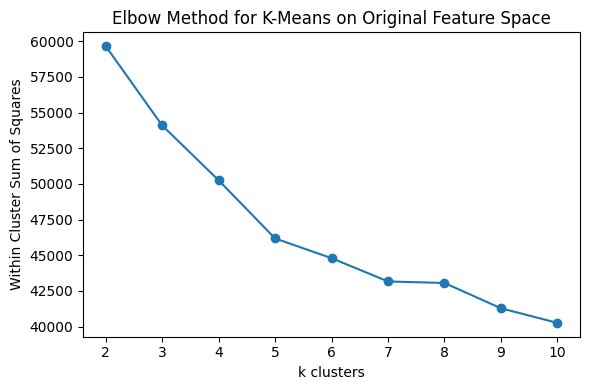

In [12]:
kmeans_elbow_analysis(X_pca)

We can actually see that the elbow more so occurs around 4 to 5 clusters for this specific dataset, however, that number of clusters did not yield great silhouette scores when compared to 3 clusters, so we will unfortunately not use the plot in this case

### KMeans groups interpretation

Lets now look at the cluster centroids for each of the 3 clusters to see if we can gather any characteristics for each of the groups

In [13]:
X_full_pca = pca.transform(df)

# Predict cluster for full dataset
full_labels = kmeans.predict(X_full_pca)

df['cluster'] = full_labels

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
df.groupby('cluster').mean()

,cat__class_of_worker_grouped_federal government,cat__class_of_worker_grouped_local government,cat__class_of_worker_grouped_not in universe,cat__class_of_worker_grouped_private,cat__class_of_worker_grouped_self employed,cat__class_of_worker_grouped_state government,cat__class_of_worker_grouped_unemployed,cat__education_grouped_advanced_degree,cat__education_grouped_college,cat__education_grouped_high_school_or_less,cat__education_grouped_some_college,cat__marital_stat_grouped_ never married,cat__marital_stat_grouped_married,cat__marital_stat_grouped_previously married,cat__major_industry_code_Education,cat__major_industry_code_Manufacturing-durable goods,cat__major_industry_code_Not in universe or children,cat__major_industry_code_Retail trade,cat__major_industry_code_other,cat__major_occupation_code_Adm support including clerical,cat__major_occupation_code_Executive admin and managerial,cat__major_occupation_code_Not in universe,cat__major_occupation_code_Other service,cat__major_occupation_code_Precision production craft & repair,cat__major_occupation_code_Professional specialty,cat__major_occupation_code_Sales,cat__major_occupation_code_other,cat__race_Amer Indian Aleut or Eskimo,cat__race_Asian or Pacific Islander,cat__race_Black,cat__race_Other,cat__race_White,cat__sex_Female,cat__sex_Male,cat__ft_or_pt_grouped_fulltime,cat__ft_or_pt_grouped_partime,cat__ft_or_pt_grouped_unemployed,cat__citizenship_grouped_not a citizen,cat__citizenship_grouped_us citizen,cat__veterans_benefits_1,cat__veterans_benefits_2,cat__has_financial_activity_0,cat__has_financial_activity_1,cat__num_persons_worked_for_employer_0,cat__num_persons_worked_for_employer_1,cat__num_persons_worked_for_employer_2,cat__num_persons_worked_for_employer_3,cat__num_persons_worked_for_employer_4,cat__num_persons_worked_for_employer_5,cat__num_persons_worked_for_employer_6,num__age,num__weeks_worked_in_year
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000510,0.002004,0.980091,0.009275,0.006931,0.000781,0.000408,0.039886,0.071550,0.737209,0.151356,0.044676,0.583849,0.371475,0.001733,0.000985,0.980295,0.003228,0.013760,0.002276,0.001903,0.980295,0.003262,0.001359,0.001801,0.002072,0.007033,0.006557,0.017429,0.080689,0.004994,0.890331,0.613236,0.386764,0.003601,0.000985,0.995413,0.043895,0.956105,0.036998,0.963002,0.781103,0.218897,0.934022,0.023035,0.006217,0.007271,0.006829,0.003703,0.018924,1.441709,-1.313816
1,0.031012,0.080957,0.012544,0.710588,0.119949,0.043711,0.001238,0.087776,0.175984,0.443966,0.292275,0.207184,0.646596,0.146220,0.084284,0.095004,0.012566,0.146253,0.661892,0.150508,0.135245,0.012566,0.104642,0.110687,0.148464,0.110279,0.227608,0.009041,0.028868,0.083466,0.015164,0.863462,0.461240,0.538760,0.419341,0.052487,0.528172,0.073464,0.926536,0.008046,0.991954,0.675309,0.324691,0.000519,0.216755,0.093048,0.129244,0.142882,0.059538,0.358013,-0.330128,0.670893
2,0.003366,0.012611,0.814524,0.134445,0.020626,0.007855,0.006573,0.025703,0.098001,0.597093,0.279203,0.315806,0.556268,0.127926,0.016886,0.012504,0.820135,0.048680,0.101795,0.028802,0.007107,0.820135,0.041146,0.013786,0.015015,0.025275,0.048734,0.016405,0.046329,0.142300,0.027520,0.767447,0.752538,0.247462,0.030619,0.005557,0.963824,0.161163,0.838837,0.008496,0.991504,0.914823,0.085177,0.752859,0.063909,0.027787,0.034626,0.031634,0.014321,0.074864,-0.671438,-1.177277


There are different characteristics we can identify in each of the groups here. For example we can see cluster 0 represents the older demographic as its z score for age is by far the highest of the clusters. For cluster 1 we can see most of the individuals work in the private class. Then we can also see cluster 2 contains the highest proportion of females

## DBSCAN

We are going to now test the DBSCAN algorithm which is a density based algorithm that does not require you to input the number of clusters before, so it will determine the number of clusters for you. 

### Eps plot

This plot is similar in nature to the kmeans elbow plot above, where we are looking for the elbow of the chart to determine the optimal value for the eps parameter in the DBSCAN function

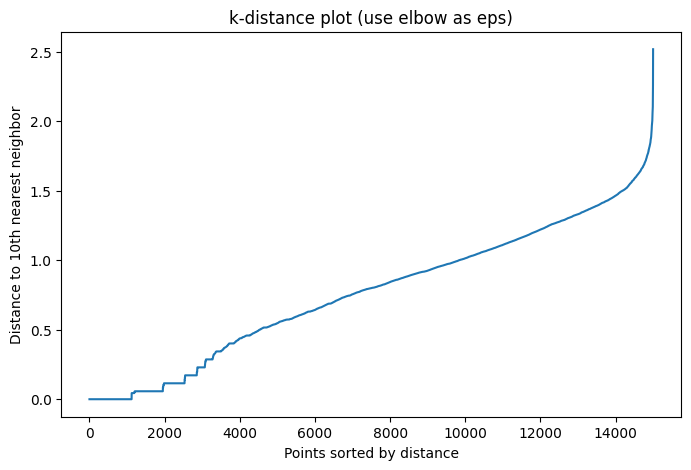

In [16]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components = 14, random_state = 42)
X = pca.fit_transform(df_tst)

# k-distance plot (k ~= min_samples)
min_samples = 10
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, _ = nbrs.kneighbors(X)
kdist = np.sort(distances[:, -1])

plt.figure(figsize=(8,5))
plt.plot(kdist)
plt.title("k-distance plot (use elbow as eps)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {min_samples}th nearest neighbor")
plt.show()

Based on the plot above, we can see the elbow seems to occur around an eps of around 1.5, therefore, we will likely test values around 1.5 when evaluating our DBSCAN algorithm

The function below is again very similar to the K-Means one above where we are itering through different combinations of parameters for both DBSCAN and PCA to determine the one with the highest silhouette score

In [17]:
def best_pca_dbscan(df, random_seed=42):
    records = []
    components_list = [14, 16, 20, 24, 28]
    eps_list = [1, 1.5, 2, 2.5, 3, 3.5]         # adjust after k-distance plot
    min_samples_list = [20, 50, 150, 200]

    for n_comp in components_list:
        pca = PCA(n_components=n_comp, random_state=random_seed)
        X = pca.fit_transform(df)

        for eps in eps_list:
            for ms in min_samples_list:
                db = DBSCAN(eps=eps, min_samples=ms, n_jobs=-1)
                labels = db.fit_predict(X)

                # noise handling
                noise_frac = (labels == -1).mean()
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

                # compute metrics only if we have at least 2 clusters (excluding noise)
                mask = labels != -1
                valid = (mask.sum() > 1) and (n_clusters >= 2)

                if valid:
                    Xv = X[mask]
                    lv = labels[mask]
                    sil = silhouette_score(Xv, lv)
                    ch = calinski_harabasz_score(Xv, lv)
                    dv = davies_bouldin_score(Xv, lv)
                else:
                    sil, ch, dv = np.nan, np.nan, np.nan

                records.append({
                    "pca_n_components": n_comp,
                    "eps": eps,
                    "min_samples": ms,
                    "n_clusters": n_clusters,
                    "noise_frac": noise_frac,
                    "silhouette": sil,
                    "calinski_harabasz": ch,
                    "davies_bouldin": dv,
                    "explained_variance_ratio_sum": pca.explained_variance_ratio_.sum()
                })

    return pd.DataFrame(records)

We will again do it on a representative sample to improve computation time

In [18]:
df_tst = df.sample(n=15000, random_state=42)
results_dbscan = best_pca_dbscan(df_tst, random_seed=42)

In [19]:
results_dbscan = results_dbscan.sort_values(['silhouette'], ascending = False)
results_dbscan

,pca_n_components,eps,min_samples,n_clusters,noise_frac,silhouette,calinski_harabasz,davies_bouldin,explained_variance_ratio_sum
99,28,1.0,200,4,0.884533,0.590176,2572.306618,0.637100,0.963182
75,24,1.0,200,4,0.883400,0.585079,2554.489297,0.643829,0.936089
98,28,1.0,150,4,0.882133,0.582832,2551.666812,0.650135,0.963182
51,20,1.0,200,4,0.880667,0.578212,2576.344554,0.655298,0.897005
74,24,1.0,150,4,0.880533,0.575955,2524.550593,0.658840,0.936089
...,...,...,...,...,...,...,...,...,...
115,28,3.0,200,1,0.000000,NaN,NaN,NaN,0.963182
116,28,3.5,20,1,0.000000,NaN,NaN,NaN,0.963182
117,28,3.5,50,1,0.000000,NaN,NaN,NaN,0.963182
118,28,3.5,150,1,0.000000,NaN,NaN,NaN,0.963182


So we can se that the silhouette score is much higher when compared to K-Means, however, the noise fraction is 0.88 meaning DBSCAN found most of the points to be outliers. This means that only a small sample of points remain to be clustered, making it much simpler for the model to find meaningful clusters

We will again do something similar to the above where we will reduce the dataset to 28 components this time calculate the labels then view those labels in 2 dimensions.

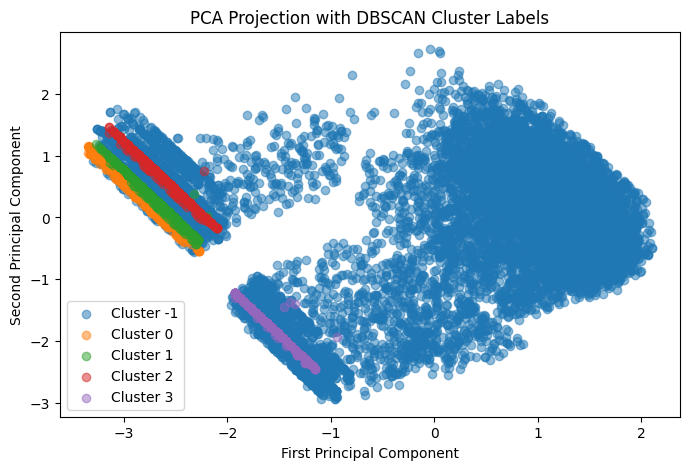

In [20]:
pca = PCA(n_components = 28, random_state = 42)
X_pca = pca.fit_transform(df_tst)
dbscan = DBSCAN(eps = 1, min_samples = 200)
labels = dbscan.fit_predict(X_pca)
pca_2 = PCA(n_components = 2, random_state = 42)
X_pca_2 = pca_2.fit_transform(df_tst)
df_pca = pd.DataFrame(X_pca_2, columns = ['pc1', 'pc2'])
df_pca['cluster'] = labels

plt.figure(figsize=(8,5))

for cluster in sorted(df_pca['cluster'].unique()):
    subset = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(
        subset['pc1'],
        subset['pc2'],
        alpha=0.5,
        label=f"Cluster {cluster}"
    )

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection with DBSCAN Cluster Labels')
plt.legend()
plt.show()

Our intuition above was correct in that a large majority of the points here are labeled as noise with the rest of the sample being clustered into very separable areas. Based on incosistency of the results of DBSCAN despite its higher scores, we are going to use KMeans in the final segmentation model